In [38]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
np.random.seed(42)
x = 2*np.random.rand(100,1)-1
y = 4*x -2 + np.random.rand(100,1)

In [40]:
x_b = np.c_[np.ones((100,1)),x]             # adding bias term
# x_b

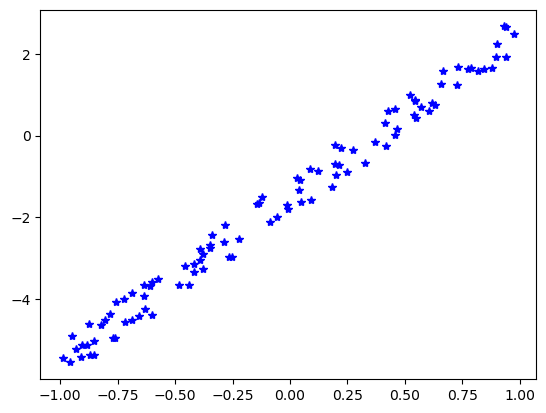

In [41]:
plt.plot(x,y,'b*')
plt.show()

In [42]:
sol = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [43]:
sol

array([[-1.50316817],
       [ 3.98323418]])

In [44]:
x_new = np.linspace(-1,1, 200).reshape(200,1)
x_new_b = np.c_[np.ones((200,1)), x_new]
y_new = x_new_b.dot(sol)

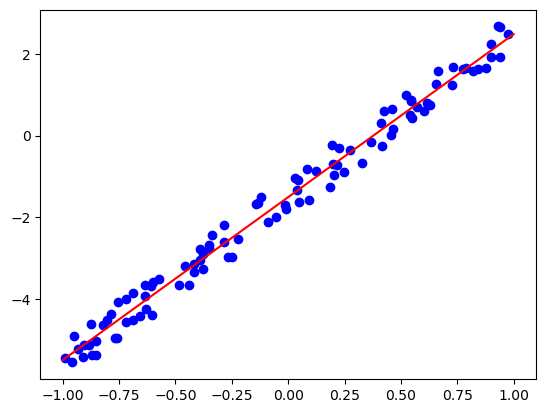

In [45]:
plt.plot(x,y,'bo')      # scattered points
plt.plot(x_new,y_new,'r-')
plt.show()

In [46]:
np.random.seed(102)
z = np.random.rand(10)
z

array([0.59768158, 0.6759869 , 0.29928174, 0.73074027, 0.57873939,
       0.80901767, 0.1672485 , 0.31214497, 0.35793155, 0.4917473 ])

# Finding the solution from gradient descent

In [47]:

theta = 0.1
eta= 0.2
m =len(x)
iterations = 1000
for i in range(iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) -y)
    # if i<10:
        # print(theta)
    theta = theta - eta *  gradients

In [48]:
theta[:,0]

array([-1.50316817,  3.98323418])

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [50]:
lin_reg.coef_, lin_reg.intercept_

(array([[3.98323418]]), array([-1.50316817]))

In [51]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

In [52]:
sgd_reg.fit(x,y.ravel())

SGDRegressor()

In [53]:
sgd_reg.coef_, sgd_reg.intercept_

(array([3.77889661]), array([-1.52129423]))

In [54]:
y_new_sgd = x_new_b.dot(theta[:,0])

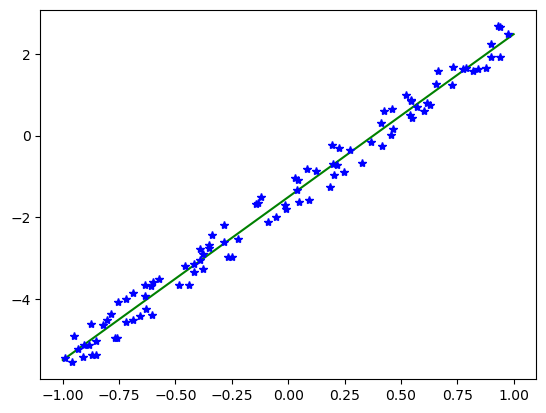

In [55]:
plt.plot(x_new,y_new_sgd,'g-')
plt.plot(x,y,'b*')
plt.show()